In [1]:
import numpy as np
import pandas as pd

def generate_dataset(samples, x_range, y_range, noise_level):
    # Генеруємо рівномірно розподілені значення для X
    X = np.linspace(x_range[0], x_range[1], samples)
    
    # Створюємо лінійну залежність для Y
    Y_pred = np.linspace(y_range[0], y_range[1], samples)
    
    # Додаємо випадковий шум до Y
    noise = (np.random.random(samples) - 0.5) * noise_level
    Y = Y_pred + noise
    
    # Повертаємо DataFrame з результатом
    return pd.DataFrame({"X": X, "Y": Y})

# Виклик функції для генерації набору даних
dataset = generate_dataset(300, (0, 400), (10, 500), 50)

# Перегляд перших рядків
print(dataset.head())

          X          Y
0  0.000000  18.058212
1  1.337793   5.347568
2  2.675585  -1.022144
3  4.013378  -2.337524
4  5.351171  -4.702728


In [3]:
import pandas as pd
import zipfile

# Вказуємо повний шлях до архіву
zip_path = r"C:\Users\gomel\Downloads\archive.zip"

# Відкриваємо архів та зчитуємо CSV файл
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("Marvel Vs DC NEW.csv") as f:
        data = pd.read_csv(f)

# Переглядаємо перші кілька рядків
print(data.head())

   ID                              Movie      Year                     Genre  \
0   0                           Eternals     -2021    Action,Adventure,Drama   
1   1                               Loki  (2021– )  Action,Adventure,Fantasy   
2   2  The Falcon and the Winter Soldier     -2021    Action,Adventure,Drama   
3   3                        WandaVision     -2021       Action,Comedy,Drama   
4   4            Spider-Man: No Way Home     -2021   Action,Adventure,Sci-Fi   

   RunTime                                        Description  IMDB_Score  
0        0  The saga of the Eternals, a race of immortal b...         0.0  
1        0      A new Marvel chapter with Loki at its center.         0.0  
2   50 min  Following the events of 'Avengers: Endgame,' S...         7.5  
3  350 min  Blends the style of classic sitcoms with the M...         8.1  
4        0       A continuation of Spider-Man: Far From Home.         0.0  


In [6]:
import numpy as np
import pandas as pd

# Встановлення випадкового seed для відтворюваності
np.random.seed(42)

# Генерація випадкових даних
n_samples = 100
X = np.random.rand(n_samples, 1) * 10  # 100 зразків, значення від 0 до 10
noise = np.random.randn(n_samples, 1)  # Додавання шуму

# Визначення цільової змінної з певною залежністю
y = 2.5 * X + 1.5 + noise

# Створення DataFrame
df = pd.DataFrame(np.hstack((X, y)), columns=['feature', 'target'])

# Виведення перших 5 рядків
print(df.head())

    feature     target
0  3.745401  10.950550
1  9.507143  24.968850
2  7.319939  19.891609
3  5.986585  14.478893
4  1.560186   5.180794


Mean Squared Error (MSE): 0.6536995137170043
R-squared: 0.9889180712579216


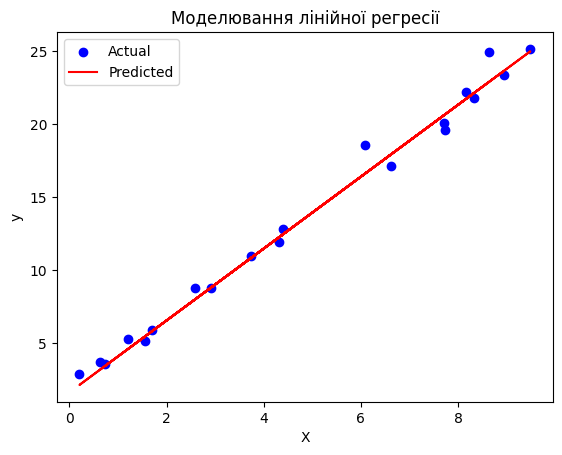

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Розділимо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створюємо модель лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозування
y_pred = model.predict(X_test)

# Оцінка моделі
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Візуалізація результатів
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Моделювання лінійної регресії')
plt.show()